In [15]:
%mv web_pages_data.rtf web_pages_data.csv #reformat file .rtf --> .csv

THE DATA: (36 records)
     Page  Time
0  Page A  0.21
1  Page B  2.53
2  Page A  0.35
3  Page B  0.71
4  Page A  0.67 

BOX PLOTS: The difference between means spent time: 21.4 sec


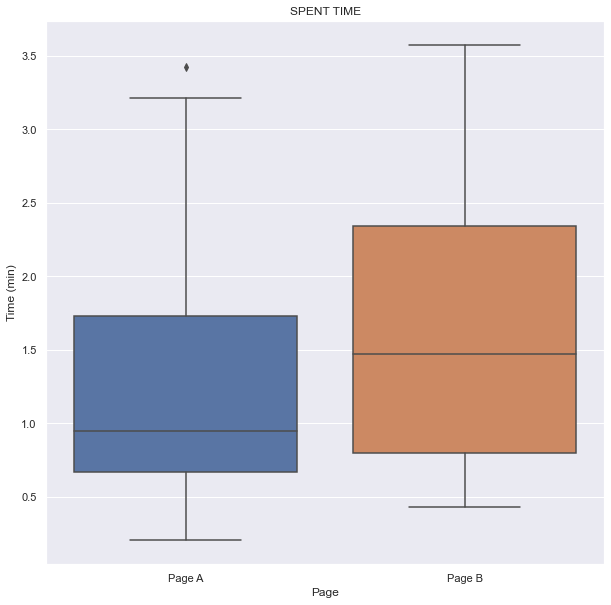

RANDOMIZE PERMUTATION TEST:


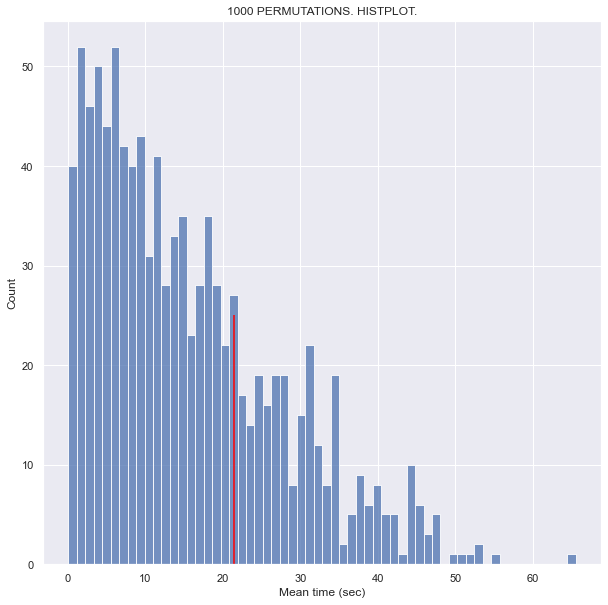

PERMUTATION TEST RESULT:
The Difference (21,4 sec) is deep in the permutation distribution.
Therefore this result may be due to chance with high degree of probability. 


In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# %matplotlib inline

df = pd.read_csv('web_pages_data.csv', sep=',', skiprows=8, header=None)  #read file
df.rename(columns={0:'Page', 1:'Time'}, inplace=True)  # rename columns

time = np.array(df['Time']) # value type in column "Time" is string
time_to_float = []

# remove extra characters and cast n to float
for n in time:
    n = n.replace('\\','')
    n = n.replace('}','')
    n = float(n)
    time_to_float.append(n)
  
df['Time'] = time_to_float

# THE DATA
print('THE DATA: (36 records)')
print(df.head(), '\n')

# Separate df -> Page "A" & Page "B"
A = df[df['Page']=='Page A']
B = df[df['Page']=='Page B']

nA = len(A)
nB = len(B)

# Calculate difference between mean visiting time of Page "A" & Page "B"
meanA = np.mean(A['Time'])
meanB = np.mean(B['Time'])
difference = np.absolute((meanA-meanB)*60).round(2)

# Draw Boxplots
print(f'BOX PLOTS: The difference between means spent time: {difference} sec')
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['Page'], y=df['Time'])
plt.ylabel('Time (min)')
plt.title('SPENT TIME')
plt.show()

# PERMURARTION TEST
# Generating samples with same length of pages A & B and calculating difference 
# between means of this samples x R times. Samples whithout replace.
R = 1000
permutation_means = []
for i in range(R):
    smplA = df.sample(nA, replace=False)
    indexes = df.index.delete(smplA.index)
    smplB = df.iloc[indexes]
    m1 = float(np.mean(smplA['Time']))
    m2 = float(np.mean(smplB['Time']))
    permutation_means.append((np.abs(m1-m2)*60).round(2))

print('RANDOMIZE PERMUTATION TEST:')

# Draw histplot
plt.figure(figsize=(10,10))
plt.vlines(x=difference, ymin=0, ymax=25, colors='Red')
sns.histplot(x=permutation_means, bins=60)
plt.xlabel('Mean time (sec)')
plt.title(f'{R} PERMUTATIONS. HISTPLOT.')
plt.show()

# Output
print('PERMUTATION TEST RESULT:')
print('The Difference (21,4 sec) is deep in the permutation distribution.')
print('Therefore this result due to chance with high degree of probability.')